# Poverty in Brazil Analysis from 2016 - 2020

## Topics to analyse

### Poverty by gender:

### 1 - Gender
### 2 - Age
### 3 - Education
### 4 - Region
### 5 - Skin Color
### 6 - Work Situation
### 7 - Poverty

In [1]:
# Import the library 
import pandas as pd

In [2]:
df = pd.read_csv('C:/Andre files/Brazil Poverty/archive/poverty_brazil.csv')
df

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
0,0,59,5,8,1,1.0,1,2,0
1,0,21,5,8,1,0.0,1,0,0
2,0,59,2,9,1,1.0,1,1,0
3,1,58,5,8,1,1.0,1,2,0
4,1,56,2,9,1,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
20747,1,46,4,11,1,1.0,1,0,0
20748,0,47,1,3,1,0.0,1,2,0
20749,0,41,7,4,1,1.0,1,1,0
20750,1,42,7,7,1,1.0,1,1,0


### Data cleaning and preparation

#### - Look at some information about this data
#### - Fix any missing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20752 entries, 0 to 20751
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   woman              20752 non-null  int64  
 1   age                20752 non-null  int64  
 2   education          20752 non-null  int64  
 3   work               20752 non-null  int64  
 4   metropolitan_area  20752 non-null  int64  
 5   non_white          20751 non-null  float64
 6   urban              20752 non-null  int64  
 7   work_permit        20752 non-null  int64  
 8   poverty            20752 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.4 MB


In [4]:
df.describe()

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
count,20752.000000,20752.000000,20752.000000,20752.000000,20752.000000,20751.000000,20752.000000,20752.000000,20752.000000
mean,0.393552,40.861845,4.533009,5.342907,0.370519,0.545612,0.786671,1.264746,0.224942
std,0.488549,12.598501,1.891997,3.174946,0.482955,0.497927,0.409668,0.747717,0.417554
min,0.000000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,40.000000,5.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,50.000000,6.000000,8.000000,1.000000,1.000000,1.000000,2.000000,0.000000
max,1.000000,91.000000,7.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [5]:
# Let's now find all numeric variables
numerics = ['int64', 'int32', 'int64', 'float64', 'float32', 'float64']

num_df = df.select_dtypes(include=numerics)
len(num_df.columns)

9

In [6]:
# Percentages of missing values
df.isna().sum().sort_values(ascending=False)

non_white            1
woman                0
age                  0
education            0
work                 0
metropolitan_area    0
urban                0
work_permit          0
poverty              0
dtype: int64

In [7]:
# Dropping missing values - In this case only 1 row.
data = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

#### Gender

In [8]:
# Female = 1 not female = 0
data.woman

0        0
1        0
2        0
3        1
4        1
        ..
20747    1
20748    0
20749    0
20750    1
20751    0
Name: woman, Length: 20751, dtype: int64

In [9]:
# Let's get the gender types
gender_type = df.woman.unique()
len(gender_type)

2

In [10]:
# Gender within the dataset
gender_division = data.woman.value_counts()
gender_division

0    12584
1     8167
Name: woman, dtype: int64

<AxesSubplot:>

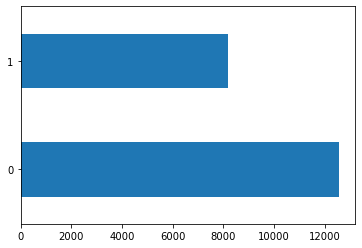

In [11]:
# Let's plot this
gender_division.plot(kind='barh')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='woman', ylabel='Density'>

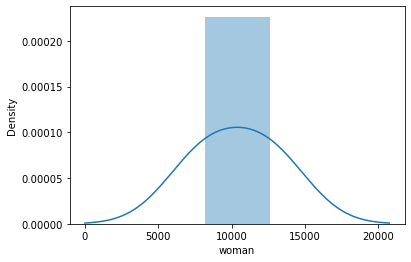

In [12]:
import seaborn as sns

sns.distplot(gender_division) # Normally distributed 

In [13]:
Male = gender_division[0]
Female = gender_division[1]
Total = 20751

print(Male, Female)

12584 8167


In [14]:
Male / Total * 100

60.64286058503205

In [15]:
Female / Total * 100

39.35713941496795

<AxesSubplot:ylabel='woman'>

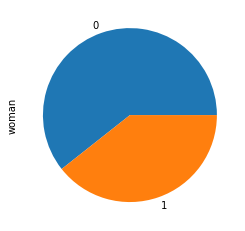

In [16]:
gender_division.plot(kind = 'pie')

In [17]:
# 60% of the dataset is composed by Men and 40% by Women 

#### Age

In [18]:
data

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
0,0,59,5,8,1,1.0,1,2,0
1,0,21,5,8,1,0.0,1,0,0
2,0,59,2,9,1,1.0,1,1,0
3,1,58,5,8,1,1.0,1,2,0
4,1,56,2,9,1,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
20747,1,46,4,11,1,1.0,1,0,0
20748,0,47,1,3,1,0.0,1,2,0
20749,0,41,7,4,1,1.0,1,1,0
20750,1,42,7,7,1,1.0,1,1,0


In [19]:
data.age

0        59
1        21
2        59
3        58
4        56
         ..
20747    46
20748    47
20749    41
20750    42
20751    49
Name: age, Length: 20751, dtype: int64

In [20]:
data.age.mean()


40.861018746084525

In [21]:
data.age.median()

40.0

In [22]:
# Let's get the age types
age_type = data.age.unique()
len(age_type)

76

In [23]:
# Age per type
Age_type = data.age.value_counts()
Age_type

38    630
40    625
41    618
39    592
36    585
     ... 
85      1
91      1
89      1
86      1
87      1
Name: age, Length: 76, dtype: int64

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

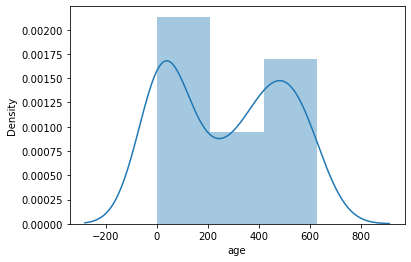

In [24]:
sns.distplot(Age_type) 

In [25]:
# The average age of the dataset is 40 years old 

#### Education


In [26]:
data

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
0,0,59,5,8,1,1.0,1,2,0
1,0,21,5,8,1,0.0,1,0,0
2,0,59,2,9,1,1.0,1,1,0
3,1,58,5,8,1,1.0,1,2,0
4,1,56,2,9,1,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
20747,1,46,4,11,1,1.0,1,0,0
20748,0,47,1,3,1,0.0,1,2,0
20749,0,41,7,4,1,1.0,1,1,0
20750,1,42,7,7,1,1.0,1,1,0


In [27]:
data.education
# 1 - No education and less than 1 year of study
# 2 - Incomplete elementary or equivalent
# 3 - Complete fundamental or equivalent
# 4 - Incomplete audio or equivalent
# 5 - Complete audio or equivalent
# 6 - Incomplete higher or equivalent
# 7 - Superior complete

0        5
1        5
2        2
3        5
4        2
        ..
20747    4
20748    1
20749    7
20750    7
20751    5
Name: education, Length: 20751, dtype: int64

In [28]:
data.education.mean()

4.532889981205725

In [29]:
# Let's get the Education types
edu_type = data.education.unique()
len(edu_type)

7

In [30]:
# Education per type
Education_Type = data.education.value_counts()
Education_Type

5    6644
2    4913
7    4886
3    1583
6    1181
4    1145
1     399
Name: education, dtype: int64

<AxesSubplot:>

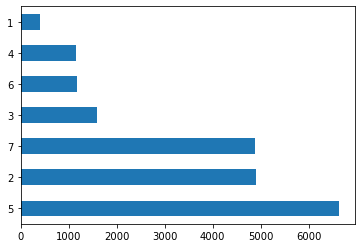

In [31]:
# Let's plot this
Education_Type.plot(kind='barh')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

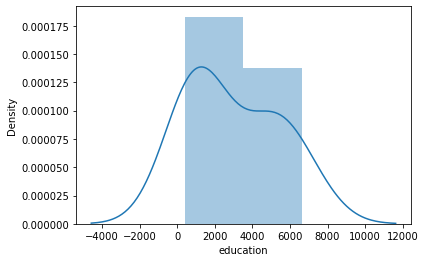

In [32]:
sns.distplot(Education_Type)

In [33]:
No_edu = Education_Type[1]
Incomplete_elementary = Education_Type[2]
Complete_fundamental = Education_Type[3]
Incomplete_audio = Education_Type[4]
Complete_audio = Education_Type[5]
Incomplete_higher = Education_Type[6]
Complete_superior = Education_Type[7]


Total = 20751

print(No_edu, Incomplete_elementary, Complete_fundamental, Incomplete_audio, Complete_audio, Incomplete_higher, Complete_superior)

399 4913 1583 1145 6644 1181 4886


In [34]:
No_edu / Total *100

1.9227989012577706

In [35]:
Incomplete_elementary / Total*100

23.67596742325671

In [36]:
Complete_fundamental/Total*100

7.628548021782083

In [37]:
Incomplete_audio/Total*100

5.517806370777311

In [38]:
Complete_audio/Total*100

32.01773408510433

In [39]:
Incomplete_higher/Total*100

5.691291985928389

In [40]:
Complete_superior/Total*100

23.5458532118934

In [41]:
# 32% do have a complete basic education 23% with Incomplete basic and 23% with superior education. 

#### Region

In [42]:
data

,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
0,0,59,5,8,1,1.0,1,2,0
1,0,21,5,8,1,0.0,1,0,0
2,0,59,2,9,1,1.0,1,1,0
3,1,58,5,8,1,1.0,1,2,0
4,1,56,2,9,1,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
20747,1,46,4,11,1,1.0,1,0,0
20748,0,47,1,3,1,0.0,1,2,0
20749,0,41,7,4,1,1.0,1,1,0
20750,1,42,7,7,1,1.0,1,1,0


In [43]:
data.metropolitan_area

0        1
1        1
2        1
3        1
4        1
        ..
20747    1
20748    1
20749    1
20750    1
20751    1
Name: metropolitan_area, Length: 20751, dtype: int64

In [44]:
# Let's get the Area types
area_type = data.metropolitan_area.unique()
len(area_type) # There are two types of areas, metropolitan and not metropolitan

2

In [45]:
# Region per type
Region_Type = data.metropolitan_area.value_counts()
Region_Type
# - 1 Lives in a metropolitan area
# - 0 Does not live in a metropolitan area

0    13063
1     7688
Name: metropolitan_area, dtype: int64

<AxesSubplot:>

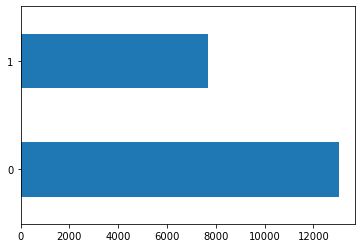

In [46]:
# Let's plot this
Region_Type.plot(kind='barh')

In [47]:
Metropolitan = 7688
Not_Metropolitan = 13063

In [48]:
Metropolitan / Total * 100

37.048816924485564

In [49]:
Not_Metropolitan / Total * 100

62.95118307551443

In [50]:
# 37% of the sample analysed lives in a metropolitan area and 63% does not.

#### Ethnic / Skin Colour 

In [51]:
data.non_white

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
20747    1.0
20748    0.0
20749    1.0
20750    1.0
20751    1.0
Name: non_white, Length: 20751, dtype: float64

In [52]:
# Let's get the Ethnic types
skin_colour = data.non_white.unique()
len(skin_colour) # There are two types skin clour, White and not White

2

In [53]:
# Ethnic per type
Ethnic = data.non_white.value_counts()
Ethnic
# - 1 not white (black, brown, yellow and indigenous)
# - 0 white

1.0    11322
0.0     9429
Name: non_white, dtype: int64

<AxesSubplot:>

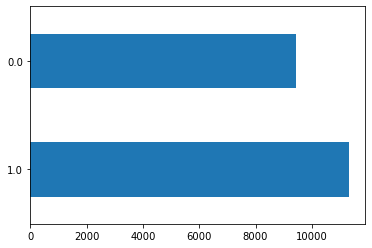

In [54]:
# Let's plot this
Ethnic.plot(kind='barh')

In [55]:
White = 9429
Not_White = 11322

In [56]:
White / Total * 100

45.43877403498627

In [57]:
Not_White / Total *100

54.56122596501374

In [58]:
# 45% of the sample is white and 55% is not 

#### Work Status

In [59]:
data.work_permit

0        2
1        0
2        1
3        2
4        1
        ..
20747    0
20748    2
20749    1
20750    1
20751    2
Name: work_permit, Length: 20751, dtype: int64

In [60]:
# Let's get the Work_Status types
work_status = data.work_permit.unique()
len(work_status) # There are three types of work permit. 
# 0 - does not have a work permit
# 1 - has a work permit
# 2 - other situations, employer, civil servant

3

In [61]:
# Work Permit per type
Work_Statuts = data.work_permit.value_counts()
Work_Statuts

2    9274
1    7696
0    3781
Name: work_permit, dtype: int64

<AxesSubplot:>

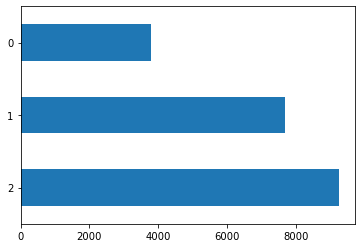

In [62]:
# Let's plot this
Work_Statuts.plot(kind='barh')

In [63]:
No_work_Permit = 3781
Has_Work_Permit = 7696
Other = 9274

In [64]:
No_work_Permit / Total * 100

18.2208086357284

In [65]:
Has_Work_Permit / Total * 100

37.08736928340803

In [66]:
Other / Total *100

44.691822080863574

In [67]:
# 18% does not have work permit, 37% does have it, and 45% is in other situations as described above.

#### Poverty 

In [68]:
data.poverty

0        0
1        0
2        0
3        0
4        0
        ..
20747    0
20748    0
20749    0
20750    0
20751    0
Name: poverty, Length: 20751, dtype: int64

In [69]:
# Let's get the Work_Status types
social_situation = data.poverty.unique()
len(social_situation) # There are two types of social_status. 
# 1 - was poor in 2020 interview
# 0 - not poor in 2020 interview

# poverty: individuals who received less than BRL 457 in 2020. 
# BRL 457 is approx. £73 and $87 in current exchange rate as of 07/2022

2

In [70]:
# Social Status Permit per type
Poverty = data.poverty.value_counts()
Poverty

0    16083
1     4668
Name: poverty, dtype: int64

<AxesSubplot:>

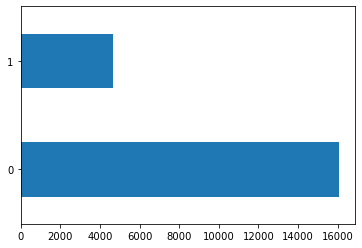

In [71]:
# Let's plot this
Poverty.plot(kind='barh')

In [72]:
Not_Poor = 16083
Poor = 4668

In [73]:
Not_Poor / Total * 100

77.50469856874368

In [74]:
Poor / Total *100

22.495301431256326

In [75]:
# 78% was not poor in 2020 and 22% was poor in 2020. 

##### Let's now explore more the characteristics of those in poverty 

In [81]:
data.groupby(['poverty','non_white'])['age'].count()
# - 1 not white (black, brown, yellow and indigenous)
# - 0 white

poverty  non_white
0        0.0          8113
         1.0          7970
1        0.0          1316
         1.0          3352
Name: age, dtype: int64

In [82]:
# Being poor and and not white equals 3352
# Being Poor and and white equals 1316
# Not poor and not white equals 7970
# Not poor and white equals 8113

In [83]:
data.groupby(['poverty','education'])['age'].count()
# 1 - No education and less than 1 year of study
# 2 - Incomplete elementary or equivalent
# 3 - Complete fundamental or equivalent
# 4 - Incomplete audio or equivalent
# 5 - Complete audio or equivalent
# 6 - Incomplete higher or equivalent
# 7 - Superior complete

poverty  education
0        1             161
         2            2972
         3            1129
         4             779
         5            5334
         6            1041
         7            4667
1        1             238
         2            1941
         3             454
         4             366
         5            1310
         6             140
         7             219
Name: age, dtype: int64

In [ ]:
# Poor and with incomplete elementary education is the majority of poor 

##### Logistic Regression 
###### The goal is to find a relationship between Poverty and the other variables. In addition, we will predict the probability 
###### of an individual being poor based on their personal characteristics such as gender, skin colour, education, age etc. 

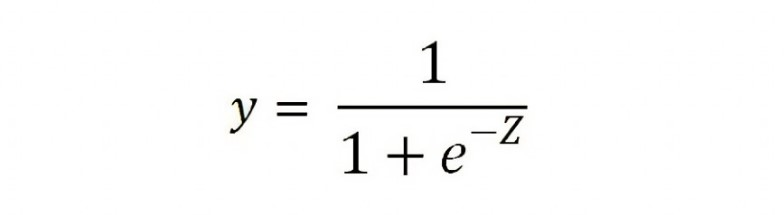

In [84]:
# This is the logistic regression formula that we are going to use to find association between our explanatory variables
# and our dependent variable, which is (y = Poverty)

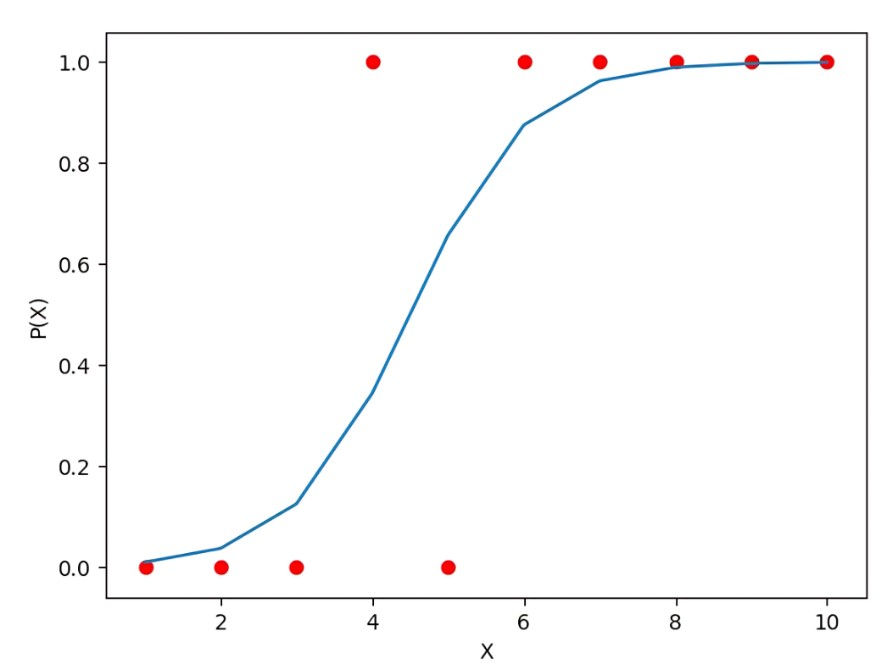

In [85]:
# This is the graph of a logistic regression. Note that there is no linearity like a linear regression. The reason for this,
# is because our dependent variable is categorical that is "Yes" or "No".  

In [90]:
# The libraries we are going to need are
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing 
%matplotlib inline
import matplotlib.pyplot as plt

In [94]:
data.columns

Index(['woman', 'age', 'education', 'work', 'metropolitan_area', 'non_white',
       'urban', 'work_permit', 'poverty'],
      dtype='object')

In [95]:
X = np.asarray(data[['woman', 'age', 'education', 'work', 'metropolitan_area', 'non_white', 'work_permit']])
X[0:5]

array([[ 0., 59.,  5.,  8.,  1.,  1.,  2.],
       [ 0., 21.,  5.,  8.,  1.,  0.,  0.],
       [ 0., 59.,  2.,  9.,  1.,  1.,  1.],
       [ 1., 58.,  5.,  8.,  1.,  1.,  2.],
       [ 1., 56.,  2.,  9.,  1.,  1.,  1.]])

In [96]:
y = np.asarray(data['poverty'])
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [101]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5] 

array([[-0.80560457,  1.43983719,  0.24689738,  0.83692477,  1.30351123,
         0.91258062,  0.98340264],
       [-0.80560457, -1.57652919,  0.24689738,  0.83692477,  1.30351123,
        -1.09579359, -1.69146801],
       [-0.80560457,  1.43983719, -1.3387936 ,  1.15189287,  1.30351123,
         0.91258062, -0.35403268],
       [ 1.24130378,  1.36045912,  0.24689738,  0.83692477,  1.30351123,
         0.91258062,  0.98340264],
       [ 1.24130378,  1.201703  , -1.3387936 ,  1.15189287,  1.30351123,
         0.91258062, -0.35403268]])

In [103]:
# Train and Test the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (14525, 7) (14525,)
Test set: (6226, 7) (6226,)


In [105]:
# Modeling the regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [106]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob # first column is the prob of class 1 P(Y=1|X) and second column is prob of class 0, P(Y=0|X)

array([[0.6061929 , 0.3938071 ],
       [0.50693278, 0.49306722],
       [0.67010456, 0.32989544],
       ...,
       [0.90951234, 0.09048766],
       [0.59711463, 0.40288537],
       [0.89235053, 0.10764947]])

In [111]:
# Jaccard index for accuracy
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.15532178217821782